## Creating the environement

In [1]:
import gymnasium as gym
import pygame
import numpy as np
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import time

In [2]:
class SimpleCorridor(gym.Env):
    def __init__(self, size=15):
        self.length = size
        self.start_pos = 0
        self.end_pos = self.length - 1
        self.action_space = gym.spaces.Discrete(2)
        self.observation_space = gym.spaces.Box(
            0.0, self.length, shape=(2,), dtype=int)
        self.mode = "rgb_array"
        self.width = 20

    def reset(self):
        self.current_pos = self.start_pos
        return np.array([self.current_pos, self.end_pos])

    def step(self, action):
        if action == 0 and self.current_pos > 0:
            self.current_pos -= 1
        if action == 1 and self.current_pos < self.length - 1:
            self.current_pos += 1
        done = self.current_pos == self.end_pos
        reward = 1 if done else -1
        info = {}
        return np.array([self.current_pos, self.end_pos]), reward, done, info

    def simulate_step(self, tpos, action):
        if action == 0 and tpos > 0:
            tpos -= 1
        if action == 1 and tpos < self.length -1:
            tpos += 1
            
        done = tpos == self.end_pos
        reward = 1 if done else -1
        info = {}
        return tpos, reward, done, info
        
    def render(self, mode="rgb_array"):
        canvas = pygame.Surface((self.width, self.width * self.length + 1))
        canvas.fill((255,255,255))
        for i in range(self.length+1):
            pygame.draw.line(canvas, 0, (0, 20*(i)), (20, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (0,0), (0, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (19,0), (19, 20*(i)), width=1)
        pygame.draw.circle(canvas, (0, 0, 255), (10,self.current_pos*20+10), 7)
        pygame.draw.circle(canvas, (255, 0, 0), (10,(self.end_pos)*20+10), 7)
        plArray = np.array(pygame.surfarray.pixels3d(canvas))
        plt.imshow(plArray)        
        plt.axis("off")


## Test Agent Function 

In [3]:
def test_agent(env: gym.Env, policy: callable, episodes: int = 10) -> None: 
    for episode in range(episodes):
        temp = env.reset()
        tagent_pos = temp[0]
        ttarget_pos = temp[1]
        done = False  
       
        env.render(mode="rgb_array")
        while not done:
            p = policy(tagent_pos)
            action = np.random.choice(2,p=p)

            next_state, _, done, _ = env.step(action)
            env.render()
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            
            
            tagent_pos = next_state[0]

## Initialising the environment 

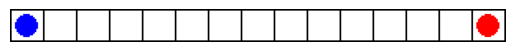

In [4]:
env = SimpleCorridor()
env.reset()
env.render()


## Q Value Table

In [5]:
action_values = np.zeros(shape=(15,2))
print(action_values)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Creating the Policy

In [6]:
def policy(state, epsilon = 0.2):
    if np.random.random() < epsilon:
        return np.random.choice(2)
    else: 
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [7]:
action = policy(0, epsilon = 0.5)
print(f"The action taken in state 0 is {action}")

The action taken in state 0 is 0


#### Testing the policy

# Implementing the algorithm

In [8]:
def on_policy_mc_cotrol(policy, action_values, episodes, gamma = 0.99, epsilon = 0.2):

    sa_returns = {}

    for episode in range(1, episodes + 1):
        positions = env.reset()
        state = positions[0]
        done = False
        transitions = []

        while not done: 
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [9]:
on_policy_mc_cotrol(policy, action_values, 10000)

TypeError: unhashable type: 'numpy.ndarray'